# **Train/test split**

- To do this, we import train_test_split from sklearn-dot-model_selection. We call train_test_split, passing our features and targets. We commonly use 20-30% of our data as the test set. 
- By setting the test_size argument to zero-point-three we use 30% here. The random_state argument sets a seed for a random number generator that splits the data. 
- Using the same number when repeating this step allows us to reproduce the exact split and our downstream results. It is best practice to ensure our split reflects the proportion of labels in our data. 
- So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting stratify equal to y. train_test_split returns four arrays: the training data, the test data, the training labels, and the test labels. 
- We unpack these into X_train, X_test, y_train, and y_test, respectively. We then instantiate a KNN model and fit it to the training data using the dot-fit method. 
- To check the accuracy, we use the dot-score method, passing X test and y test. The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

In [ ]:
0.8800599700149925

# **Model complexity and over/underfitting**

- We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. 
- We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. - We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. 
- We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. 
- We then calculate training and test set accuracy, storing the results in their respective dictionaries.

In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# **Plotting our results**

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.title("KNN: Varying Number of Neighbors")  # Set the plot title
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")  # Plot training accuracy
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")  # Plot testing accuracy
plt.legend()  # Show the legend
plt.xlabel("Number of Neighbors")  # Set the x-axis label
plt.ylabel("Accuracy")  # Set the y-axis label
plt.show()  # Display the plot

# **Model complexity curve**

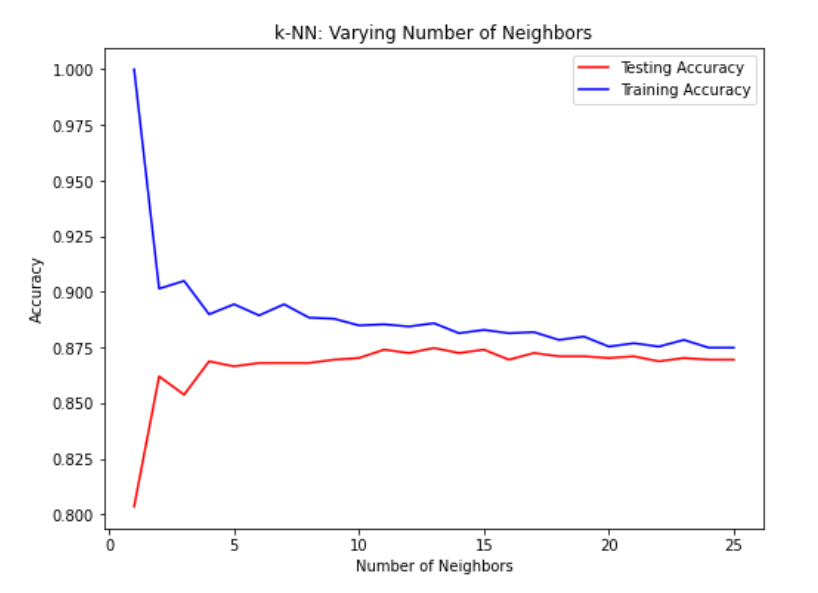

Here's the result! As k increases beyond 15 we see underfitting where performance plateaus on both test and training sets, as indicated in this plot.